In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def generate_data_v1(N):
    class NNModel(nn.Module):
        def __init__(self, input_dim, H):
            super(NNModel, self).__init__()

            self.linear1 = nn.Linear(input_dim, H)
            self.linear2 = nn.Linear(H, H) 
            self.fc = nn.Linear(H, 1)

        def forward(self, x):
            h_relu1 = F.relu(self.linear1(x))
            h_relu2 = F.relu(self.linear2(h_relu1))
            y = self.fc(h_relu2) 
            return y
    torch.manual_seed(2)
    model = NNModel(1,3)
    X = torch.FloatTensor(N, 1).uniform_(-10.0, 10.0)
    y = model(X)
    y += torch.FloatTensor(N, 1).normal_(0.0, 0.001)
    return (X,y)

In [13]:
(X,y) = generate_data_v1(100)

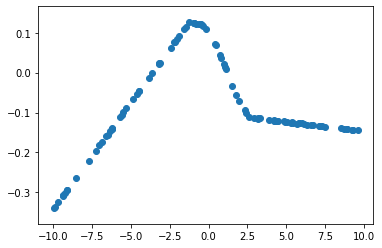

In [14]:
plt.scatter(X.detach().numpy(), y.detach().numpy())